compare different search algorithms


In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import math

sns.set_context("talk")

FILENAME = "series/series|2024-11-17|analyze_angles/data.json"

In [10]:
with open("../data/" + FILENAME) as file:
    json_file = json.load(file)#, parse_float=lambda f: round(float(f), 2))
    data = pd.json_normalize(
        json_file,
        record_path=["snapshots"],
        meta=[
            ["settings", "maxCost"],
            ["settings", "patchImprovement"],
            ["settings", "patchRecovery"],
            ["settings", "searchStrategy"],
            ["settings", "recoveryLogic"],
        ],
    )

data["pI"] = data["settings.patchImprovement"]
data["pR"] = data["settings.patchRecovery"]
data["ratio"] = data["pI"] / data["pR"]
data["costRatio"] = data["averageTravelCost"] / data["settings.maxCost"]
data["headingDegrees"] = data["avgHeading"] / (2 * math.pi) * 360
data.columns

Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'weightedHeadings', 'avgHeading',
       'avgSquareHeading', 'settings.maxCost', 'settings.patchImprovement',
       'settings.patchRecovery', 'settings.searchStrategy',
       'settings.recoveryLogic', 'pI', 'pR', 'ratio', 'costRatio',
       'headingDegrees'],
      dtype='object')

In [ ]:
# highlight = data[(data["settings.recoveryLogic"] == "LINEAR") & (data["settings.maxCost"] == 2.0) ]

In [11]:
palette = ["#d11f4f", "#7209B7", "#3A0CA3"]

In [14]:
# p = sns.relplot(
#     data=data,
#     x="steps",
#     y="headingDegrees",
#     col="settings.maxCost",
#     style="pR",
#     size="ratio",
#     hue="ratio",
#     kind="line",
#     palette=palette,
# )
# p.axes[0,0].set_xlabel('time')
# p.axes[0,0].set_ylabel("infrastructure")

# p.savefig("../data/images/ratio-1.svg")

# high_cost = list(data[(data["ratio"]==75.0) & (data["settings.maxCost"] == 10.0)]["headingDegrees"])
# low_cost  = list(data[(data["ratio"]==75.0) & (data["settings.maxCost"] == 2.0)]["headingDegrees"])
# p = sns.lineplot(high_cost, label="high cost environment")
# sns.lineplot(low_cost, label="low cost environment")
# p.set_xlabel("time")
# p.set(xticklabels=[])
# p.tick_params(bottom=False)
p.savefig("../data/images/heading-over-time.png")
# # high_cost


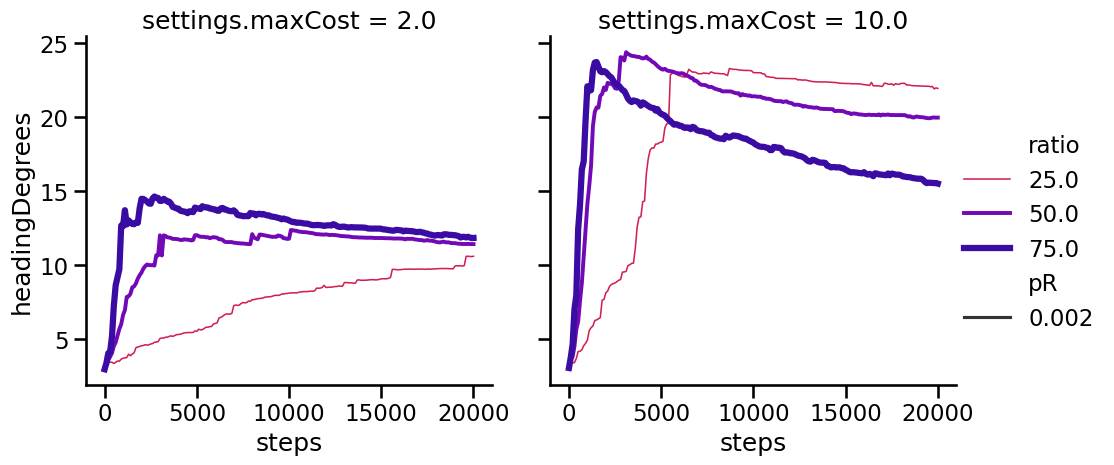

In [8]:
p = sns.relplot(
    data=data,
    x="steps",
    y="headingDegrees",
    col="settings.maxCost",
    style="pR",
    size="ratio",
    hue="ratio",
    kind="line",
    palette=palette,
)
# p.axes[0,0].set_xlabel('time')
# p.axes[0,0].set_ylabel("infrastructure")

# p.savefig("../data/images/ratio-1.svg")

# high_cost = list(data[(data["ratio"]==75.0) & (data["settings.maxCost"] == 10.0)]["headingDegrees"])
# low_cost  = list(data[(data["ratio"]==75.0) & (data["settings.maxCost"] == 2.0)]["headingDegrees"])
# p = sns.lineplot(high_cost, label="high cost environment")
# sns.lineplot(low_cost, label="low cost environment")
# p.set_xlabel("time")
# p.set(xticklabels=[])
# p.tick_params(bottom=False)
# p.get_figure().savefig("heading-over-time.png")
# # high_cost

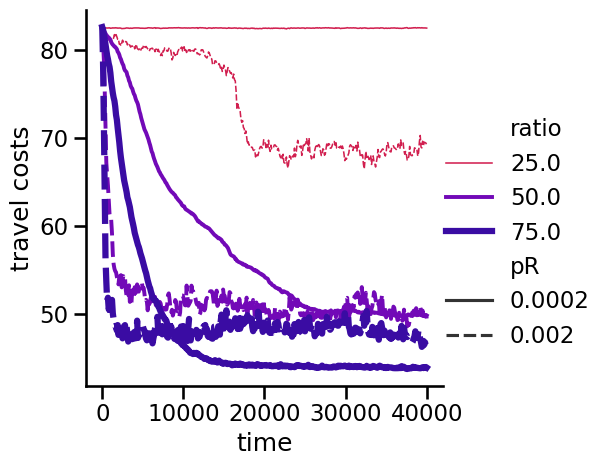

In [11]:
p = sns.relplot(
    data=highlight,
    x="steps",
    y="averageTravelCost",
    style="pR",
    hue="ratio",
    size="ratio",
    kind="line",
    palette=palette,
    legend=True,
)

p.axes[0,0].set_xlabel('time')
p.axes[0,0].set_ylabel("travel costs")
p.savefig("../data/images/ratio-2.svg")


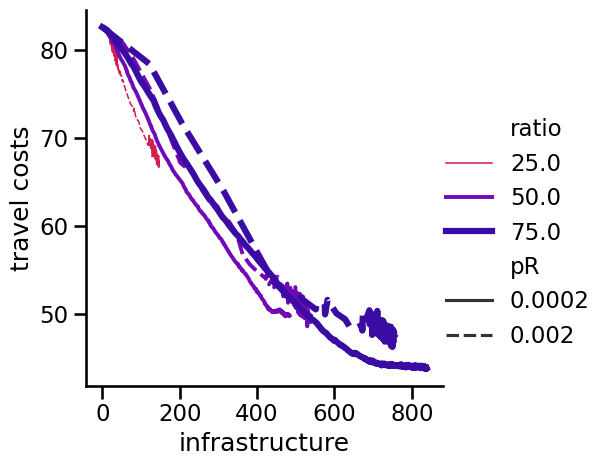

In [12]:
p = sns.relplot(
    data=highlight,
    x="totalImprovement",
    y="averageTravelCost",
    style="pR",
    hue="ratio",
    palette=palette,
    size="ratio",
    kind="line",
    legend=True,
)

p.axes[0,0].set_xlabel('infrastructure')
p.axes[0,0].set_ylabel("travel costs")
p.savefig("../data/images/ratio-3.svg")


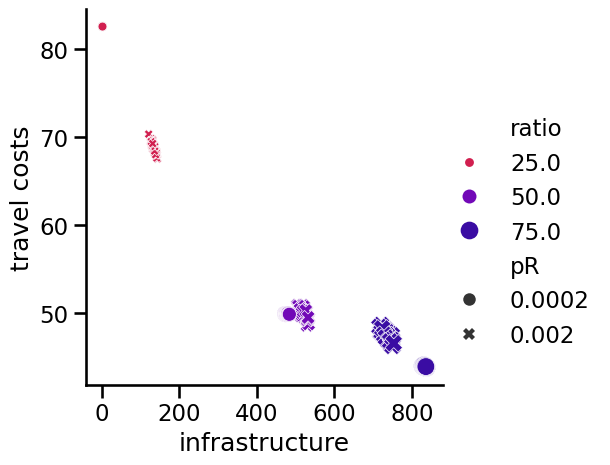

In [13]:
p = sns.relplot(
    data=highlight[highlight["steps"] >= 35000],
    x="totalImprovement",
    y="averageTravelCost",
    style="pR",
    hue="ratio",
    palette=palette,
    size="ratio",
    facet_kws={'sharey': None},
    kind="scatter",
)


p.axes[0,0].set_xlabel("infrastructure")
p.axes[0,0].set_ylabel("travel costs")
p.savefig("../data/images/ratio-4.svg")


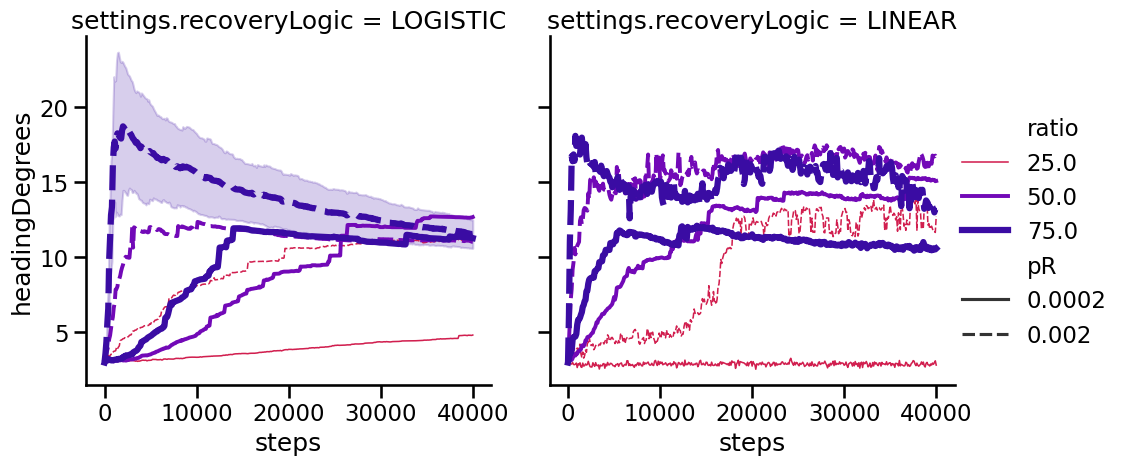

In [10]:
p = sns.relplot(
    data=data,
    x="steps",
    y="headingDegrees",
    style="pR",
    hue="ratio",
    col="settings.recoveryLogic",
    palette=palette,
    size="ratio",
    kind="line",
    legend=True,
)

# p.axes[0,0].set_xlabel('infrastructure')
# p.axes[0,0].set_ylabel("travel costs")
# p.savefig("../data/images/ratio-3.svg")
